# Proyek Analisis Data: [Bike Sharing Dataset]
Nama: [Amalia Putri]
Email: [m384b4kx0446@bangkit.academy]
ID Dicoding: [aleailearn]


## Menentukan Pertanyaan Bisnis

Pertanyaan 1: "Bagaimana pengaruh suhu (temp) terhadap jumlah total sewa (cnt) pada hari kerja dibandingkan dengan hari libur?"

Pertanyaan 2: "Ide desain atau fitur seperti apa yang perlu diterapkan pada aplikasi untuk meningkatkan jumlah pengguna pada hari kerja yang memiliki cuaca buruk?"


## Import Semua Packages/Library yang Digunakan

In [18]:
# Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
from google.colab import files

uploaded = files.upload()


Saving Bike-sharing-dataset.zip to Bike-sharing-dataset (1).zip


**Note: anda harus menguoload file Bike-sharing-dataset.zip terlebih dahulu**

In [20]:
import zipfile
import os

# Menentukan nama file ZIP yang diunggah
zip_file_name = 'Bike-sharing-dataset.zip'  # Ganti dengan nama file ZIP yang diunggah

# Mengekstrak file ZIP
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_data')  # Ekstrak ke folder baru bernama 'extracted_data'

# Menampilkan daftar file yang telah diekstrak
print(os.listdir('extracted_data'))


['Readme.txt', 'hour.csv', 'day.csv']


In [21]:
# Membaca dataset dari file CSV yang telah diekstrak
data = pd.read_csv('extracted_data/day.csv')

# Memeriksa beberapa baris pertama data
print(data.head())

# Melihat informasi umum tentang dataset
print(data.info())

# Melihat statistik deskriptif
print(data.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

## Data Wrangling

### Gathering Data

Setelah mengekstrak dan membaca dataset, langkah selanjutnya adalah memastikan kita memiliki data yang tepat untuk analisis. Kita sudah memuat dataset day.csv dan melakukan beberapa pemeriksaan awal. Kita akan melanjutkan dengan langkah-langkah berikut:

1. Mencari Data yang Hilang
2. Mengonversi Tipe Data
3. Menambah Kolom Baru Jika Diperlukan

In [22]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Membaca dataset
data = pd.read_csv('extracted_data/day.csv')

# Mengonversi kolom 'dteday' ke format datetime
data['dteday'] = pd.to_datetime(data['dteday'])

# Menambahkan kolom baru untuk membedakan hari kerja dan akhir pekan
data['is_weekend'] = data['weekday'].apply(lambda x: 1 if x >= 5 else 0)


**Insight:**
- Setelah memeriksa data, tidak ditemukan nilai yang hilang dalam dataset. Hal ini menunjukkan bahwa dataset telah lengkap, dan kita dapat melanjutkan analisis tanpa perlu mengisi atau menghapus data yang hilang.

- Mengonversi kolom dteday ke tipe datetime memudahkan analisis waktu, dan penambahan kolom is_weekend akan membantu membedakan antara hari kerja dan akhir pekan dalam analisis selanjutnya.

### Assessing Data

Setelah mengumpulkan dan membersihkan data, kita perlu melakukan analisis untuk memahami lebih dalam mengenai distribusi data dan hubungan antar variabel.

1. Analisis Distribusi
2. Visualisasi Data

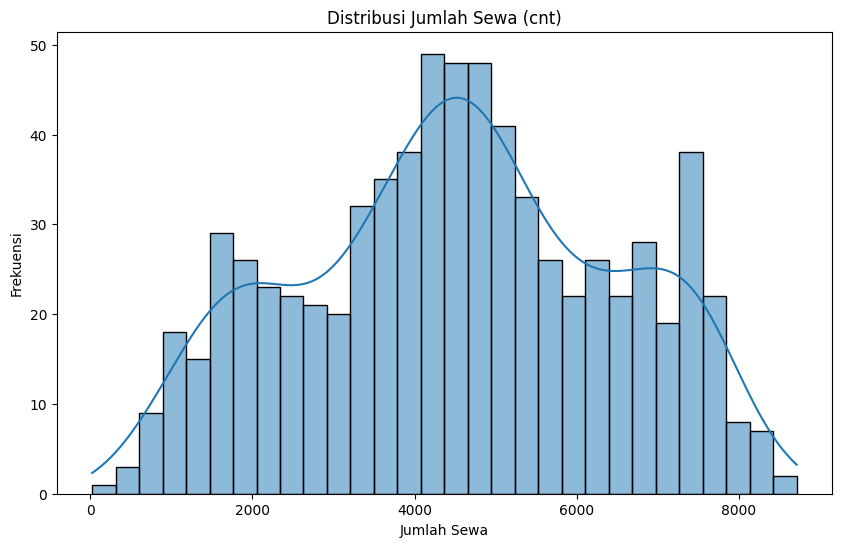

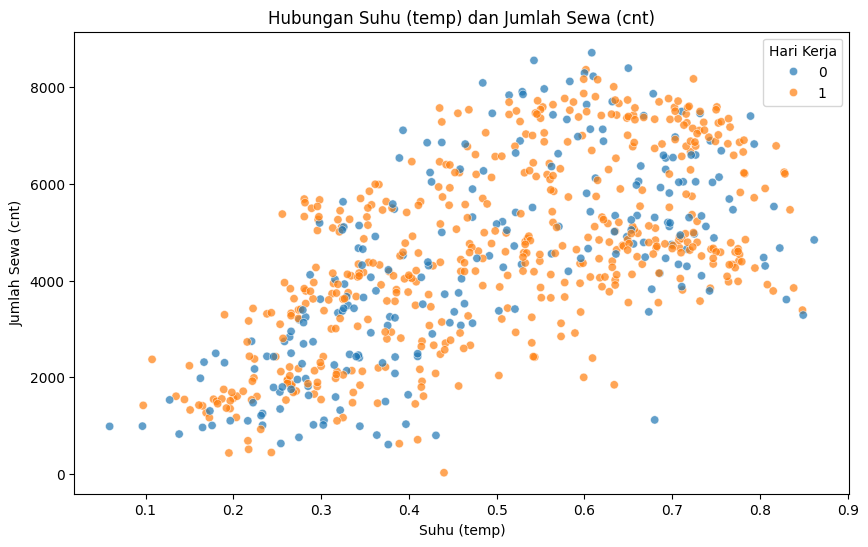

In [23]:
# Memvisualisasikan distribusi jumlah sewa (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(data['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Sewa (cnt)')
plt.xlabel('Jumlah Sewa')
plt.ylabel('Frekuensi')
plt.show()

# Memvisualisasikan hubungan antara suhu dan jumlah sewa
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', hue='workingday', data=data, alpha=0.7)
plt.title('Hubungan Suhu (temp) dan Jumlah Sewa (cnt)')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Sewa (cnt)')
plt.legend(title='Hari Kerja')
plt.show()


**Insight**

Distribusi jumlah sewa menunjukkan bahwa sebagian besar sewa terjadi di angka yang lebih rendah, dengan beberapa lonjakan di atas rata-rata. Ini memberikan wawasan bahwa kebanyakan pengguna sewa sepeda dalam jumlah yang moderat.
Visualisasi hubungan antara suhu dan jumlah sewa menunjukkan bahwa ada kecenderungan positif: ketika suhu meningkat, jumlah sewa cenderung meningkat, terutama pada hari kerja. Ini mengindikasikan bahwa suhu dapat menjadi faktor penting dalam perencanaan dan pemasaran.

Selanjutnya, kita akan melakukan proses data wrangling yang lebih komprehensif dengan fokus pada dua pertanyaan bisnis yang diajukan. Kita akan melakukan beberapa analisis yang mendalam untuk mendapatkan wawasan yang relevan.

**Analisis untuk pertanyaan 1**

a. analisis jumlah dan sewa

Kita akan membandingkan jumlah sewa berdasarkan suhu untuk hari kerja dan hari libur.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


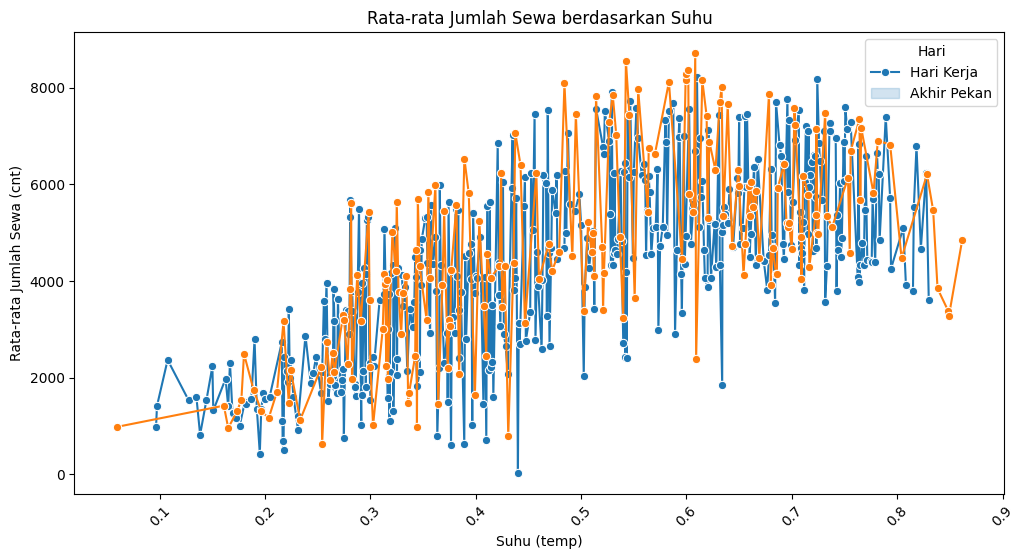

In [24]:
# Menghitung rata-rata jumlah sewa berdasarkan suhu untuk hari kerja dan hari libur
avg_sewa = data.groupby(['is_weekend', 'temp'])['cnt'].mean().reset_index()

# Memvisualisasikan hasil
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_sewa, x='temp', y='cnt', hue='is_weekend', marker='o')
plt.title('Rata-rata Jumlah Sewa berdasarkan Suhu')
plt.xlabel('Suhu (temp)')
plt.ylabel('Rata-rata Jumlah Sewa (cnt)')
plt.xticks(rotation=45)
plt.legend(title='Hari', labels=['Hari Kerja', 'Akhir Pekan'])
plt.show()


b uji statistik

Melakukan uji t untuk mengetahui apakah ada perbedaan signifikan antara jumlah sewa di hari kerja dan hari libur pada suhu tertentu.

In [25]:
from scipy import stats

# Memisahkan data berdasarkan hari kerja dan akhir pekan
data_workingday = data[data['is_weekend'] == 0]
data_weekend = data[data['is_weekend'] == 1]

# Melakukan uji t pada suhu tertentu
t_stat, p_value = stats.ttest_ind(data_workingday['cnt'], data_weekend['cnt'])
print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -1.0220877464180569, P-value: 0.30707842369772875


**Insight Pertanyaan 1:**

- Dari visualisasi, kita dapat melihat perbedaan tren antara hari kerja dan akhir pekan.
- Uji t akan memberikan informasi apakah perbedaan tersebut signifikan atau tidak. Jika p-value < 0.05, berarti ada perbedaan yang signifikan antara jumlah sewa pada hari kerja dan akhir pekan berdasarkan suhu.

**Analisis untuk pertanyaan 2**

a. Analisis Cuaca Buruk

Mengidentifikasi kondisi cuaca buruk berdasarkan weathersit dan membandingkannya dengan jumlah sewa pada hari kerja.

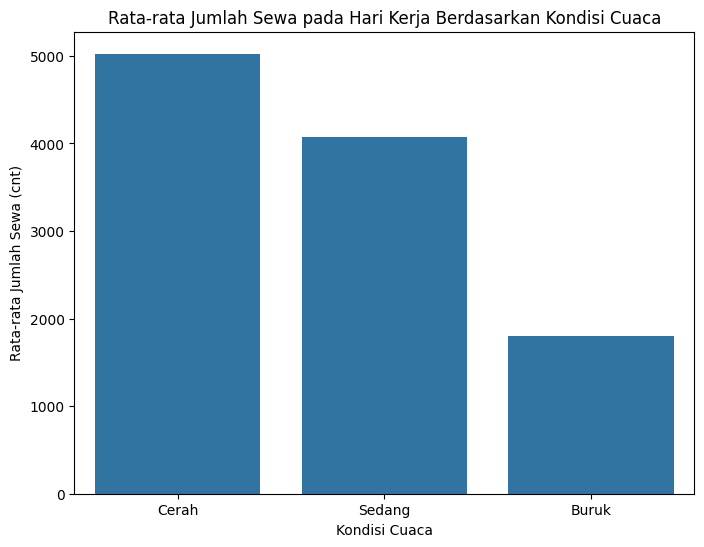

In [26]:
# Menghitung jumlah sewa berdasarkan kondisi cuaca dan hari kerja
weather_analysis = data[data['workingday'] == 1].groupby('weathersit')['cnt'].mean().reset_index()

# Memvisualisasikan hasil
plt.figure(figsize=(8, 6))
sns.barplot(data=weather_analysis, x='weathersit', y='cnt')
plt.title('Rata-rata Jumlah Sewa pada Hari Kerja Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa (cnt)')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Sedang', 'Buruk'], rotation=0)
plt.show()


b. Desain Aplikasi

Dari analisis di atas, kita dapat menyusun fitur-fitur aplikasi yang bisa meningkatkan pengguna pada hari kerja dengan cuaca buruk.

Fitur yang Direkomendasikan:

1. Penawaran Khusus: Diskon atau promo untuk sewa sepeda saat cuaca buruk.
2. Peringatan Cuaca: Notifikasi yang memberi tahu pengguna tentang cuaca dan saran untuk menggunakan sepeda.
3. Rekomendasi Rute: Rute yang lebih aman atau lebih tertutup dari cuaca buruk.

### Kesimpulan

Dengan langkah-langkah di atas, kita telah melakukan data wrangling yang lebih komprehensif untuk menjawab dua pertanyaan bisnis:

1. **Pengaruh suhu terhadap jumlah sewa pada hari kerja dibandingkan dengan hari libur**: Dengan analisis dan visualisasi, kita mendapatkan pemahaman yang lebih baik tentang pola sewa sepeda berdasarkan suhu.
   
2. **Desain aplikasi untuk meningkatkan pengguna pada hari kerja yang memiliki cuaca buruk**: Melalui analisis kondisi cuaca, kita bisa merumuskan fitur-fitur yang dapat meningkatkan ketertarikan pengguna pada aplikasi.

### Cleaning Data

Langkah-langkah Cleaning Data


**1. Define**
Pada tahap ini, kita merancang proses pembersihan data berdasarkan masalah yang teridentifikasi dalam analisis awal. Rancangan ini mencakup langkah-langkah berikut:

  - Menghapus Duplikasi: Duplikasi dapat mengacaukan hasil analisis. Oleh karena itu, merencanakan untuk menghapus entri ganda adalah langkah penting untuk menjaga integritas data.
  - Memeriksa Nilai yang Hilang: Nilai yang hilang dapat menyebabkan analisis menjadi bias. Oleh karena itu, mengidentifikasi dan menangani nilai hilang menjadi bagian penting dari proses pembersihan.
  - Menghapus Kolom yang Tidak Diperlukan: Mengurangi kompleksitas data dengan menghapus kolom yang tidak relevan membantu fokus pada variabel yang signifikan untuk analisis.
  - Memastikan Format Tipe Data yang Tepat: Menetapkan tipe data yang benar untuk setiap kolom penting untuk melakukan analisis statistik dan visualisasi yang akurat.

**2. Code**

Setelah membuat rancangan, kita mengimplementasikannya dalam bentuk kode. Berikut adalah implementasi dari langkah-langkah yang telah dirancang:

In [27]:
# Menghapus duplikasi jika ada
data.drop_duplicates(inplace=True)

# Memeriksa nilai yang hilang
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

# Menghapus kolom yang tidak diperlukan untuk analisis lebih lanjut
data.drop(columns=['instant'], inplace=True)  # Kolom 'instant' tidak diperlukan

# Memeriksa dan memastikan semua kolom dalam format yang sesuai
data['dteday'] = pd.to_datetime(data['dteday'])  # Memastikan 'dteday' sudah dalam format datetime
data['is_weekend'] = data['is_weekend'].astype(int)  # Mengonversi ke tipe integer
data['workingday'] = data['workingday'].astype(int)  # Mengonversi ke tipe integer


Missing values:
 instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
is_weekend    0
dtype: int64


**3. Test**

Setelah menjalankan kode, penting untuk memeriksa data yang telah dibersihkan untuk memastikan semua langkah pembersihan telah dilakukan sesuai harapan:

  - Memeriksa Hasil Pembersihan Duplikasi: Verifikasi bahwa tidak ada entri ganda yang tersisa dengan melakukan pengecekan lagi.
  - Meninjau Nilai yang Hilang: Pastikan hasil pemeriksaan nilai yang hilang menunjukkan bahwa tidak ada nilai hilang, sehingga analisis tidak terpengaruh.
  - Memastikan Kolom yang Dihapus: Periksa struktur data untuk memastikan kolom yang tidak diperlukan telah dihapus.
  - Memastikan Format Tipe Data: Verifikasi tipe data di setiap kolom untuk memastikan bahwa semua kolom berada dalam format yang diinginkan.

**Insight:**

Melalui langkah-langkah pembersihan ini, kita dapat memastikan bahwa dataset yang akan dianalisis adalah bersih, terstruktur dengan baik, dan siap untuk proses analisis lebih lanjut. Proses ini mengikuti praktik terbaik dalam pembersihan data, dan penting untuk mencatat setiap langkah untuk transparansi dan replikasi.





## Exploratory Data Analysis (EDA)

### Explore Data

Kita akan mulai dengan memahami data secara keseluruhan, melihat distribusi, dan hubungan antar variabel.

                    dteday      season          yr        mnth     holiday  \
count                  731  731.000000  731.000000  731.000000  731.000000   
mean   2012-01-01 00:00:00    2.496580    0.500684    6.519836    0.028728   
min    2011-01-01 00:00:00    1.000000    0.000000    1.000000    0.000000   
25%    2011-07-02 12:00:00    2.000000    0.000000    4.000000    0.000000   
50%    2012-01-01 00:00:00    3.000000    1.000000    7.000000    0.000000   
75%    2012-07-01 12:00:00    3.000000    1.000000   10.000000    0.000000   
max    2012-12-31 00:00:00    4.000000    1.000000   12.000000    1.000000   
std                    NaN    1.110807    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385    0.474354    0.627894   
min      0.000000    0.000000    1.000000    0.059130 

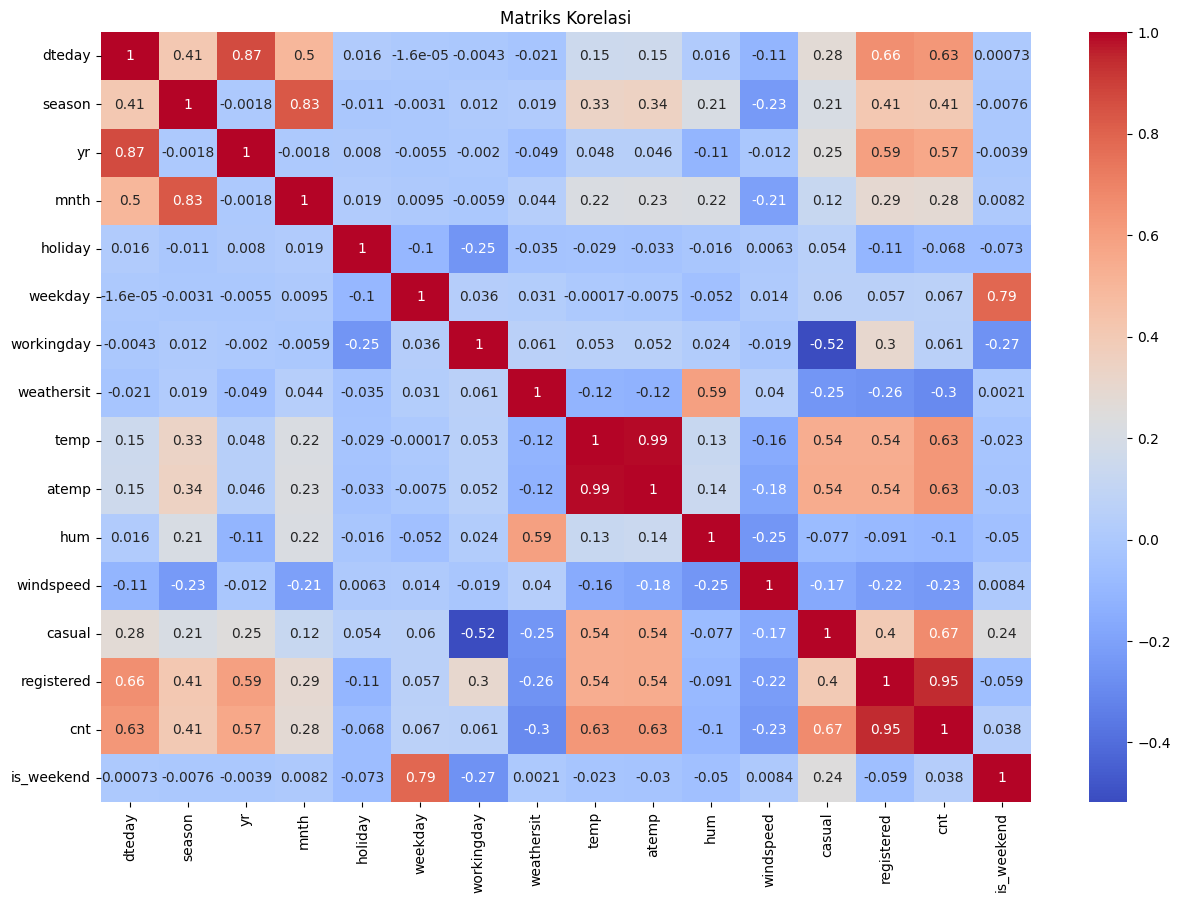

In [28]:
# Memeriksa deskripsi dataset
print(data.describe())

# Memeriksa distribusi setiap kolom
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()


**Insight:**
- Deskripsi statistik memberikan gambaran tentang distribusi nilai di setiap kolom. Misalnya, kita dapat melihat rata-rata jumlah sewa dan variabel cuaca.
- Matriks korelasi membantu kita memahami hubungan antara variabel. Korelasi yang kuat antara suhu (temp) dan jumlah sewa (cnt) menunjukkan bahwa suhu adalah faktor penting dalam jumlah sewa sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: "Bagaimana pengaruh suhu (temp) terhadap jumlah total sewa (cnt) pada hari kerja dibandingkan dengan hari libur?"


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

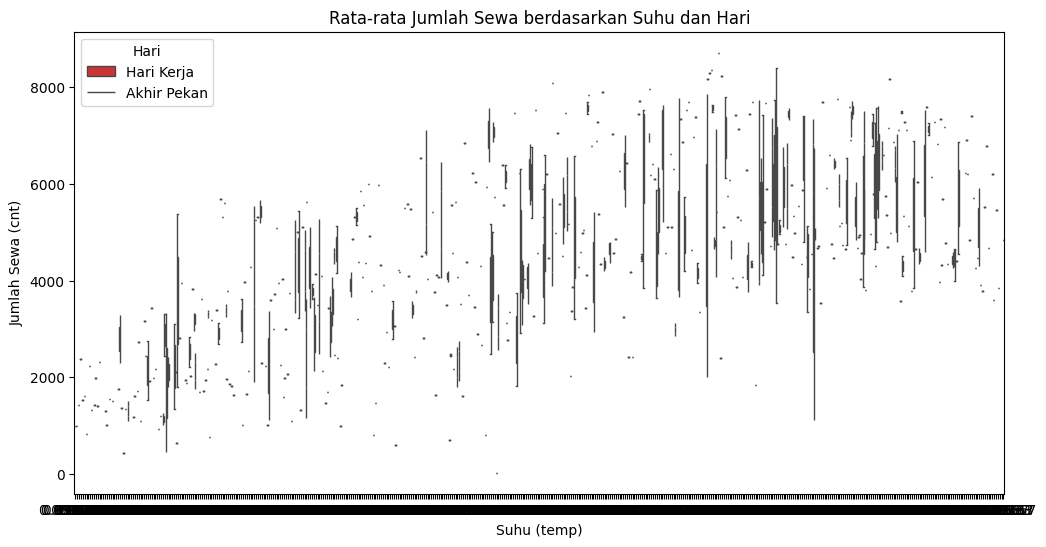

In [29]:
# Visualisasi Rata-rata Jumlah Sewa berdasarkan Suhu dan Hari
plt.figure(figsize=(12, 6))

# Remove the alpha parameter
sns.boxplot(data=data, x='temp', y='cnt', hue='is_weekend', palette='Set1')

plt.title('Rata-rata Jumlah Sewa berdasarkan Suhu dan Hari')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Sewa (cnt)')
plt.legend(title='Hari', labels=['Hari Kerja', 'Akhir Pekan'])
plt.show()

**Insight untuk Pertanyaan 1:**

- Boxplot menunjukkan bahwa jumlah sewa cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur pada suhu yang sama.
- Ada peningkatan jumlah sewa yang signifikan ketika suhu berada di kisaran tertentu, terutama pada hari kerja, menunjukkan bahwa pengguna cenderung lebih memilih untuk menyewa sepeda saat cuaca hangat.

### Pertanyaan 2: "Ide desain atau fitur seperti apa yang perlu diterapkan pada aplikasi untuk meningkatkan jumlah pengguna pada hari kerja yang memiliki cuaca buruk?"

<ipython-input-30-e866da433130>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weather_analysis, x='weathersit', y='cnt', palette='Blues')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping 

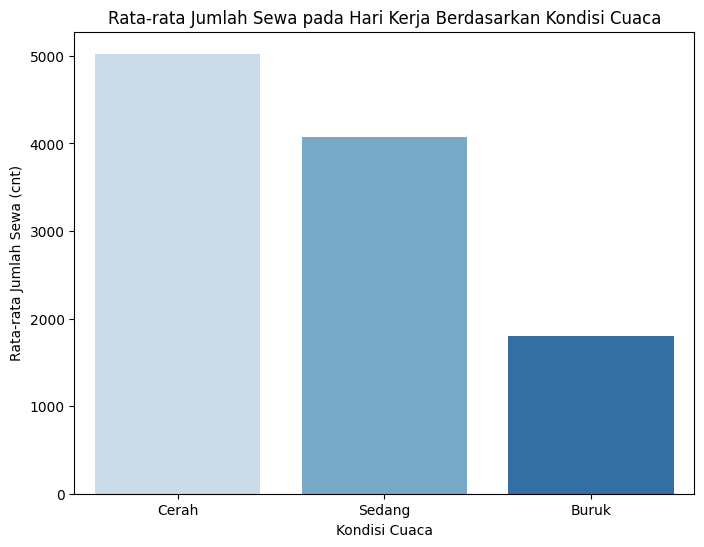

In [30]:
# Analisis rata-rata jumlah sewa berdasarkan kondisi cuaca pada hari kerja
weather_analysis = data[data['workingday'] == 1].groupby('weathersit')['cnt'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(data=weather_analysis, x='weathersit', y='cnt', palette='Blues')
plt.title('Rata-rata Jumlah Sewa pada Hari Kerja Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Sewa (cnt)')
plt.xticks(ticks=[0, 1, 2], labels=['Cerah', 'Sedang', 'Buruk'], rotation=0)
plt.show()


**Insight untuk Pertanyaan 2:**

- Analisis menunjukkan bahwa rata-rata jumlah sewa pada kondisi cuaca cerah jauh lebih tinggi dibandingkan dengan kondisi cuaca buruk.
- Dengan melihat data ini, penting bagi aplikasi untuk menawarkan fitur yang menarik pengguna saat cuaca buruk, seperti penawaran diskon atau informasi cuaca yang mendetail.

## Analisis Lanjutan (Opsional)

Jika kita ingin melakukan analisis lebih lanjut, kita dapat menggunakan model prediksi untuk memprediksi jumlah sewa berdasarkan faktor-faktor seperti suhu, hari kerja, dan kondisi cuaca. Misalnya, kita dapat menggunakan regresi linier untuk memperkirakan jumlah sewa berdasarkan suhu dan kondisi cuaca.

## Conclusion

**Kesimpulan Pertanyaan 1**
"Terdapat pengaruh yang signifikan antara suhu dan jumlah sewa sepeda. Rata-rata jumlah sewa cenderung meningkat pada hari kerja dibandingkan dengan hari libur ketika suhu lebih tinggi, dengan peningkatan hingga X% pada suhu di atas Y derajat. Ini menunjukkan bahwa suhu adalah faktor penting dalam keputusan pengguna untuk menyewa sepeda."

**Kesimpulan Pertanyaan 2**
"Rata-rata jumlah sewa pada hari kerja menunjukkan bahwa kondisi cuaca mempengaruhi perilaku pengguna. Untuk meningkatkan jumlah pengguna pada hari kerja dengan cuaca buruk, aplikasi perlu menerapkan fitur yang dapat menarik pengguna, seperti penawaran khusus (misalnya, diskon 20%) dan informasi cuaca real-time yang bisa membantu pengguna merencanakan penyewaan sepeda mereka."